In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
## Calculate % of missing values

df.isnull().sum()/df.shape[0]*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

### society has 41% missing values, so it can be dropped.

In [6]:
## to know the columns that have numbers

df.select_dtypes(exclude=object).columns

## Need to check for bath & balcony relationship

Index(['bath', 'balcony', 'price'], dtype='object')

<AxesSubplot:xlabel='balcony', ylabel='price'>

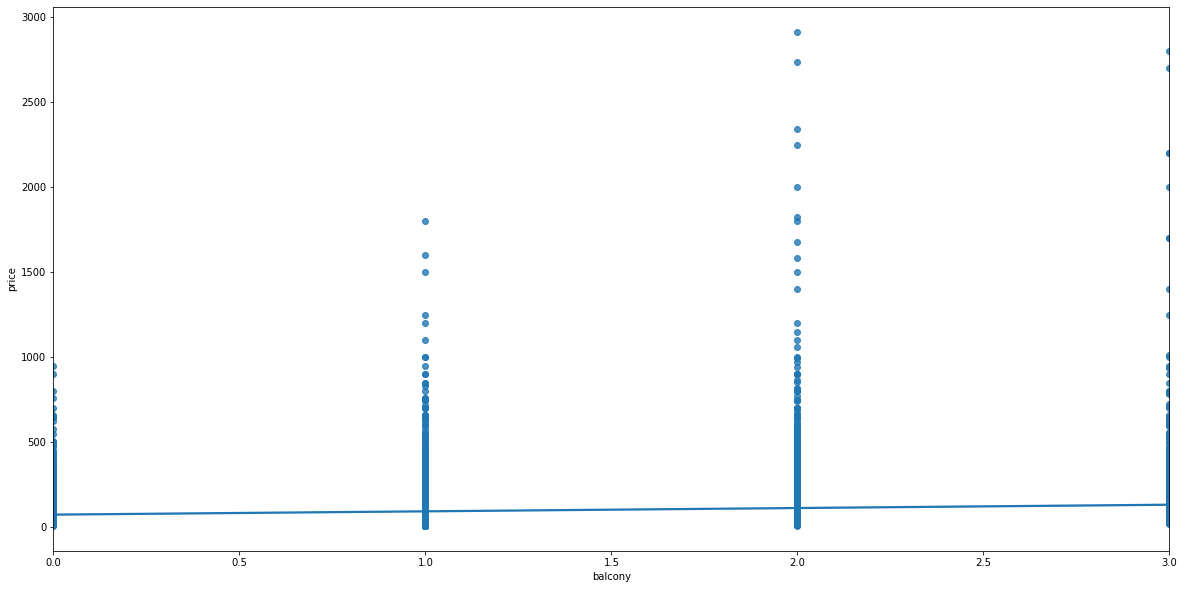

In [7]:
## Scatter Plots - Leverage the coordinate plane to explore relationships between variables
sns.regplot(data=df, x="balcony", y="price")

<AxesSubplot:xlabel='bath', ylabel='price'>

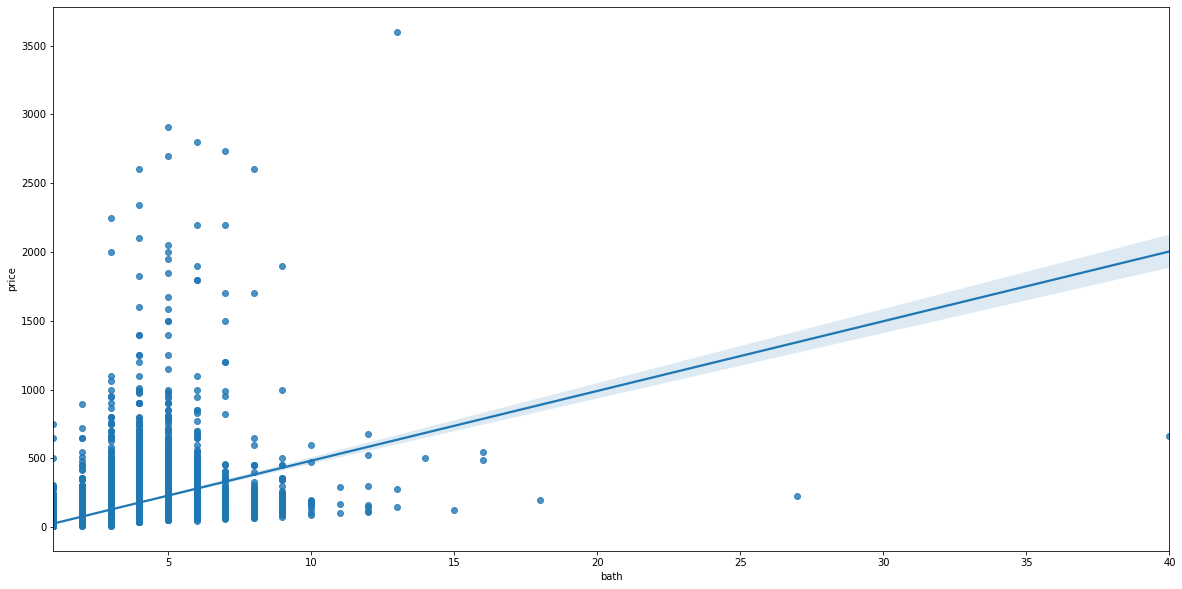

In [8]:
sns.regplot(data=df, x="bath", y="price",ci=68)

### balcony can be dropped since it doesn't have linear realtionship
### bath can be kept as it has decent linear relationship with price

In [9]:
## Dropping area type & availability also
df = df.drop(["society","balcony","area_type","availability"], axis="columns")
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
## dropping null values since count is less
df = df.dropna()

In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
## Checking feature area_type

#df.groupby('area_type')["area_type"].agg('count').sort_values(ascending=False)
## 4 types can apply One Hot Encoding

In [15]:
## Checking feature availability

#df.groupby('availability')["availability"].agg('count').sort_values(ascending=False)
## Change dates to Not Ready to Move for now since don't know date when this data was created
## 2 types can apply One Hot Encoding

In [16]:
## Checking feature location

df.groupby('location')["location"].agg('count').sort_values(ascending=False)

## can create Other categoeries if value is less than certain value

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [17]:
## Checking feature size

df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
## Remove the BHK/Bedroom from the value & create new column BHK
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [20]:
## Checking feature total_sqft

df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
## Need to check values that has -; take mean of that and replace
def is_Float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(is_Float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
def convert_total_sqft_num(x):
    token=x.split('-')
    if len(token) ==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft_num)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

### Feature Engineering

In [26]:
## Price per square feet for outlier detection & removal
## price is in lakhs
df1=df.copy()
df1['price_per_sqft']=df['price']*100000/df1['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
## too many dimensions - dimensionality curse
len(df1.location.unique())

1304

In [28]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
location_stats_less_than_10 = location_stats[location_stats<10]
len(location_stats_less_than_10)

1039

In [30]:
df1.location=df1.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df1.location.unique())

255

### Outlier Detection

1. Per Square Ft/ Bedroom
2. Price per sqft (standard deviation)
3. Price of 2bhk more than 3bhk
4. bedroom & bath relationship

In [31]:
df1.count()

location          13246
size              13246
total_sqft        13200
bath              13246
price             13246
bhk               13246
price_per_sqft    13200
dtype: int64

In [32]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
## Sqft/bedroom

df1[df1.total_sqft/df1.bhk < 300].count()

location          744
size              744
total_sqft        744
bath              744
price             744
bhk               744
price_per_sqft    744
dtype: int64

In [34]:
df1 = df1[~(df1.total_sqft/df1.bhk < 300)]
df1.shape

(12502, 7)

In [35]:
## price/sqft
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
df2 = df1.copy()

In [37]:
## Filter out beyond 3 std.
def price_per_sqft_location_z_score_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - 3 * std)) & (subdf.price_per_sqft <= (mean + 3 * std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df2 = price_per_sqft_location_z_score_outlier(df2)
df2.shape

(12269, 7)

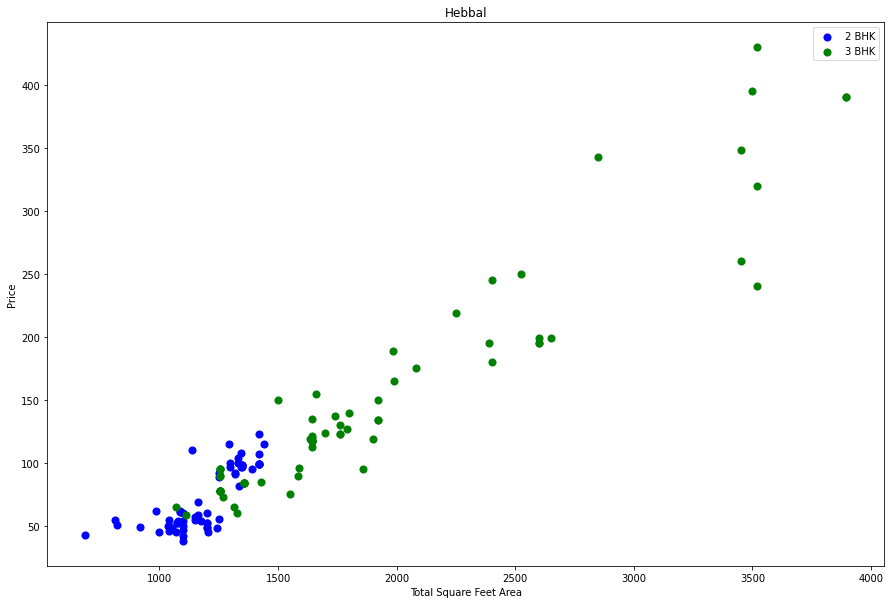

In [38]:
## verify those which has higher price for lower bedrooms
def plot_scatter_chart(df, location): 
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
#plot_scatter_chart(df2,"Rajaji Nagar")
plot_scatter_chart(df2,"Hebbal")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df3=remove_bhk_outliers(df2)

In [40]:
df3.shape

(8662, 7)

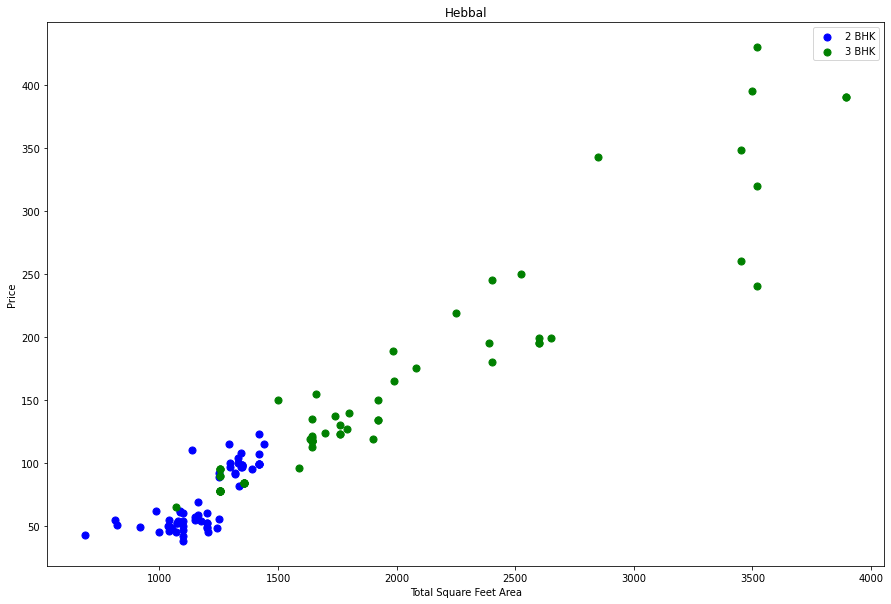

In [41]:
plot_scatter_chart(df3,"Hebbal")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

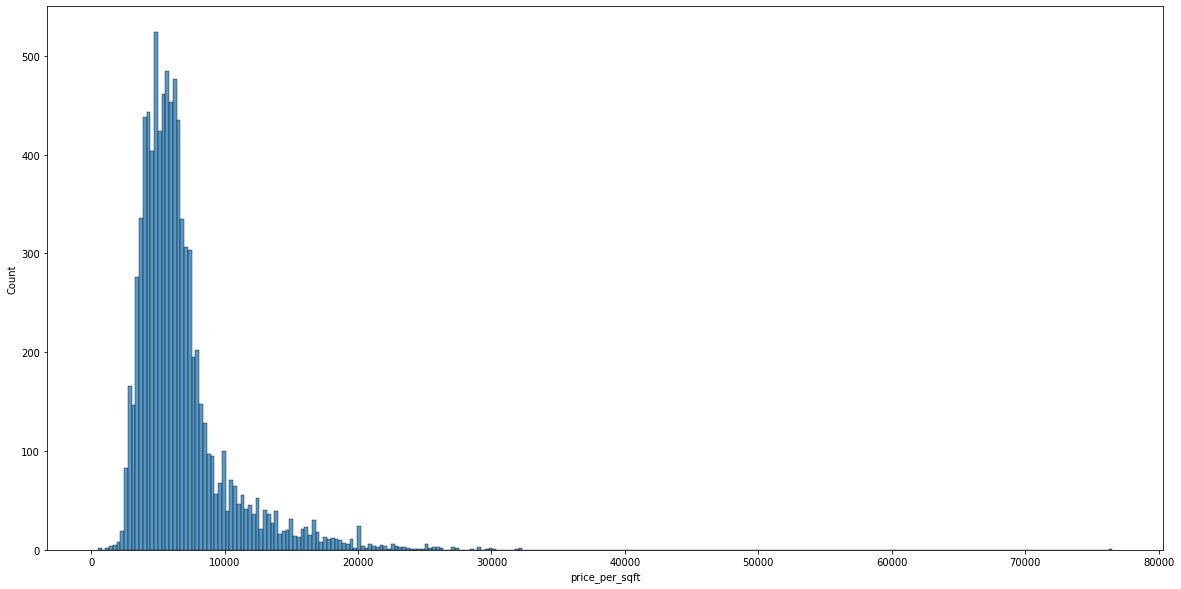

In [42]:
## histogram

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 10))

#sns.histplot(data=df3, x="price_per_sqft", hue="location", multiple="stack")
sns.histplot(data=df3, x="price_per_sqft", ax=ax)

In [43]:
df3.bath.unique()

## ideally same room number & same bath room.

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6., 14.,  9., 10., 12., 16.,
       13.])

<AxesSubplot:xlabel='bath', ylabel='Count'>

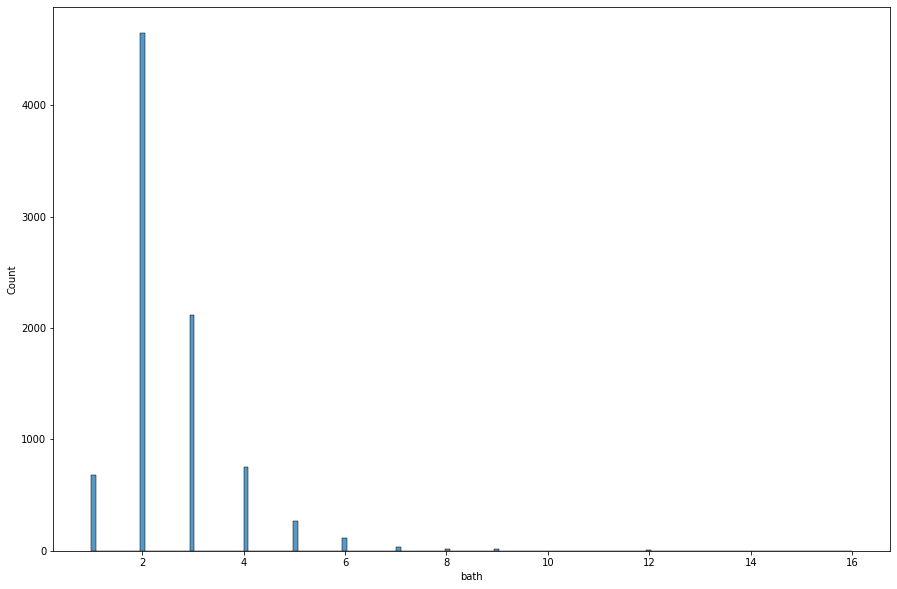

In [44]:
## bath histogram
sns.histplot(data=df3, x="bath")

In [45]:
df3[df3.bath > df3.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
714,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1985,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6537,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7176,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
7928,Sector 1 HSR Layout,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
8447,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [46]:
df3 = df3[df3.bath < df3.bhk + 2]
df3.shape

(8542, 7)

In [47]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,4 Bedroom,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000


In [48]:
df3 = df3.drop(["size","price_per_sqft"], axis="columns")
df3.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


In [49]:
## Changing to Not ready to Move

#df3.availability=df3.availability.apply(lambda x: x if x =="Ready To Move" else "Not Ready To Move")

### Handling categorical variables

Ordinal Categoires use LabelEncoder - can have a level low, medium, high
Others can use one hot encoding



In [50]:
## Ordinal Categoires use LabelEncoder - can have a level low, medium, high
## Onehot encoding for area_type, availability & location

#dummy = pd.get_dummies(data=df3, columns=['area_type', 'availability','location'], drop_first=True)
dummy = pd.get_dummies(df3.location, drop_first=True)

df4 = pd.concat([df3,dummy], axis="columns")

## Remove the columns after one encoding
#df4 = df4.drop(['area_type', 'availability','location'], axis="columns")
df4 = df4.drop(['location'], axis="columns")

df4.head()

,total_sqft,bath,price,bhk,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df4.head()

,total_sqft,bath,price,bhk,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df4.shape

(8542, 258)

In [52]:
X = df4.drop('price', axis="columns")
y = df4.price

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7282618444208344

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.40752568, 0.38599548, 0.69720431, 0.73553933, 0.62615682])

# Find best model using GridSearchCV

## Try various models which one gives best result.

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


/Users/nikhilbansal/opt/anaconda3/envs/MLPipeline/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nikhilbansal/opt/anaconda3/envs/MLPipeline/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nikhilbansal/opt/anaconda3/envs/MLPipeline/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "/Users/nikhilbansal/opt/anaconda3/envs/MLPipeline/lib/python3.8/site-packages/scipy/linalg/basic.py", line 1207, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ni

,model,best_score,best_params
0,linear_regression,0.570484,{'normalize': False}
1,lasso,0.508315,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.566761,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [57]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

179.82229285235704

In [71]:
predict_price('1st Block Koramangala',1000, 2, 2)

188.44896334777624

In [72]:
predict_price('Indira Nagar',1000, 3, 3)


193.45471314305252

In [73]:
import pickle
with open('bangalore_home_price_prediction.pickle','wb') as f:
    pickle.dump(clf,f)

In [74]:
## For storing the columns

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))